<a href="https://colab.research.google.com/github/NMT20104010/BTVN/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd /content/drive/MyDrive/Data/Money

/content/drive/MyDrive/Data/Money


In [40]:
ls

test/  train/


In [41]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
money_train = train_datagen.flow_from_directory(
    './train/',
    target_size= (150, 150),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


money_test = test_data.flow_from_directory(
    './test/', 
    target_size= (150, 150), 
    batch_size = 16,
    class_mode = 'categorical')


Found 798 images belonging to 9 classes.
Found 95 images belonging to 9 classes.


In [44]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 19, 19, 128)     

In [45]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(money_train, epochs=10, batch_size=128)

Epoch 1/10
50/50 [==============================] - 30s 590ms/step - loss: 2.5706 - accuracy: 0.1504
Epoch 2/10
50/50 [==============================] - 30s 599ms/step - loss: 2.0655 - accuracy: 0.2419
Epoch 3/10
50/50 [==============================] - 30s 591ms/step - loss: 1.7672 - accuracy: 0.3709
Epoch 4/10
50/50 [==============================] - 30s 587ms/step - loss: 1.4005 - accuracy: 0.5276
Epoch 5/10
50/50 [==============================] - 29s 585ms/step - loss: 1.0842 - accuracy: 0.6278
Epoch 6/10
50/50 [==============================] - 29s 585ms/step - loss: 0.7722 - accuracy: 0.7556
Epoch 7/10
50/50 [==============================] - 29s 585ms/step - loss: 0.4648 - accuracy: 0.8521
Epoch 8/10
50/50 [==============================] - 29s 586ms/step - loss: 0.3286 - accuracy: 0.8897
Epoch 9/10
50/50 [==============================] - 29s 586ms/step - loss: 0.2615 - accuracy: 0.9198
Epoch 10/10
50/50 [==============================] - 30s 586ms/step - loss: 0.2728 - accura

In [46]:
model.save('Money.h5')

1/1 [==============================] - 0s 25ms/step
Đây là : 20k


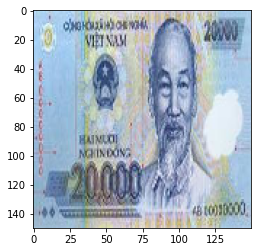

In [51]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/20k.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
class_name=['100k','10k','1k','200k','20k','2k','500k','50k','5k']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])

1/1 [==============================] - 0s 24ms/step
Đây là : 100k


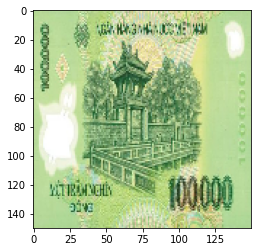

In [53]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/100.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
class_name=['100k','10k','1k','200k','20k','2k','500k','50k','5k']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])

In [54]:
!jupyter nbconvert --to html "/content/Money.ipynb"

[NbConvertApp] Converting notebook /content/Money.ipynb to html
[NbConvertApp] Writing 567961 bytes to /content/Money.html
